# Classification Agorithms

## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:** 

* Machine Learning task: Classification model 
* Target variable: Loan_Status 
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant
* **CoapplicantIncome:** Income of the co-applicant
* **LoanAmount:** Loan amount requested
* **Loan_Amount_Term:** Term of the loan
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Approved:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [18]:
# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [19]:
# check the number of rows and observations
num_rows, num_columns = df.shape
print(f'The DataFrame has {num_rows} rows and {num_columns} columns.')

The DataFrame has 614 rows and 13 columns.


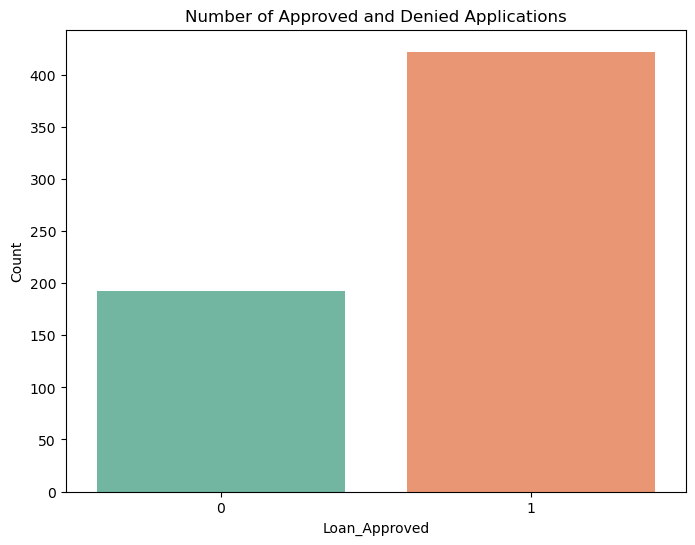

In [20]:
# How many application were approved and how many were denied? Plot a bar plot
# Assuming 'approval_status' is the column that indicates approval or denial
approval_counts = df['Loan_Approved'].value_counts()

# Plot a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=approval_counts.index, y=approval_counts.values, palette="Set2")
plt.title('Number of Approved and Denied Applications')
plt.xlabel('Loan_Approved')
plt.ylabel('Count')
plt.show()

### Data Prep

In [21]:
# drop 'Loan_ID' variable from the data. We won't need it.
# Drop the 'Loan_ID' variable from the DataFrame
df = df.drop('Loan_ID', axis=1)

# Display the first 5 rows of the DataFrame to verify the change
print(df.head(5))

  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         128               360               1   
1             1508.0         128               360               1   
2                0.0          66               360               1   
3             2358.0         120               360               1   
4                0.0         141               360               1   

  Property_Area  Loan_Approved  
0         Urban              1  
1         Rural              0  
2         Urban        

In [22]:
# Create dummy variables for all 'object' type variables except 'Loan_Status'
# Identify 'object' type columns excluding 'Loan_Status'
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns.remove('Property_Area')  # Removing 'Property_Area' as it seems 'Loan_Status' is not present in the provided data

# Create dummy variables for the identified columns
df = pd.get_dummies(df, columns=object_columns, drop_first=True)

# Display the first 5 rows of the modified DataFrame
print(df.head(5))

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         128               360   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History Property_Area  Loan_Approved  Gender_Male  Married_Yes  \
0               1         Urban              1            1            0   
1               1         Rural              0            1            1   
2               1         Urban              1            1            1   
3               1         Urban              1            1            1   
4               1         Urban              1            1            0   

   Dependents_1  Dependents_2  Dependents_3+  Education_Not Graduate  \
0             0             0              0

In [23]:
# saving this procerssed dataset
df.to_csv('Processed_Credit_Dataset.csv', index=None)

### Data Partition

In [24]:
# Seperate the input features and target variable
target_variable = 'Loan_Approved'

# Separate the input features (X) and target variable (y)
X = df.drop(target_variable, axis=1)  # Exclude the target variable column
y = df[target_variable]  # Select only the target variable column

# Display the shapes of X and y
print(f'Shape of X (input features): {X.shape}')
print(f'Shape of y (target variable): {y.shape}')

Shape of X (input features): (614, 13)
Shape of y (target variable): (614,)


In [25]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (491, 13)
Shape of X_test: (123, 13)
Shape of y_train: (491,)
Shape of y_test: (123,)


In [26]:
# check the split if interested
# Display a sample of rows from the training set
print("Sample of rows from the training set:")
print(X_train.head())
print(y_train.head())

# Display a sample of rows from the testing set
print("\nSample of rows from the testing set:")
print(X_test.head())
print(y_test.head())

Sample of rows from the training set:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
83              6000             2250.0         265               360   
90              2958             2900.0         131               360   
227             6250             1695.0         210               360   
482             2083             3150.0         128               360   
464             4166                0.0          98               360   

     Credit_History Property_Area  Gender_Male  Married_Yes  Dependents_1  \
83                1     Semiurban            1            1             0   
90                1     Semiurban            1            1             0   
227               1     Semiurban            1            1             0   
482               1     Semiurban            1            1             0   
464               0     Semiurban            1            0             0   

     Dependents_2  Dependents_3+  Education_Not Graduate  Se

# **Models**

## <font color='chocolate'>**1. Logistic Regression**</font>

In [32]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [33]:
# Fit the model on the data
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of 'object' type columns
print("List of 'object' type columns:", object_columns)

# Check if 'Loan_Status' is in the list before removing
if 'Loan_Status' in object_columns:
    object_columns.remove('Loan_Status')

# Ensure 'Property_Area' is included in the dummy variable creation
if 'Property_Area' not in object_columns:
    object_columns.append('Property_Area')

# Create dummy variables for the identified columns
df = pd.get_dummies(df, columns=object_columns, drop_first=True)

# Separate input features and target variable
X = df.drop('Loan_Approved', axis=1)
y = df['Loan_Approved']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

List of 'object' type columns: ['Property_Area']


LogisticRegression(random_state=42)

In [34]:
# From sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict the loan eligibility on testing set and calculate its accuracy.
# Predict the loan eligibility on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.79

Confusion Matrix:
[[18 25]
 [ 1 79]]


In [35]:
# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[18 25]
 [ 1 79]]


In [36]:
# check how probabilities are assigned
# Predict the probabilities on the testing set
probabilities = model.predict_proba(X_test)

# Display the first few rows of predicted probabilities
print("Predicted Probabilities:")
print(probabilities[:5])

Predicted Probabilities:
[[0.12297173 0.87702827]
 [0.1021363  0.8978637 ]
 [0.17287712 0.82712288]
 [0.21064971 0.78935029]
 [0.12984148 0.87015852]]


In [37]:
# to change the default threshold and to make it 70% and above
#(pypred[:, 1] >= 0.7).astype(int)
# Predict probabilities on the testing set
probabilities = model.predict_proba(X_test)

# Set the threshold to 70% for classifying as positive
threshold = 0.7
predicted_class = (probabilities[:, 1] >= threshold).astype(int)

# Calculate accuracy with the new threshold
accuracy_with_threshold = accuracy_score(y_test, predicted_class)
print(f"Accuracy with threshold {threshold}: {accuracy_with_threshold:.2f}")

# Calculate confusion matrix with the new threshold
conf_matrix_with_threshold = confusion_matrix(y_test, predicted_class)
print(f"\nConfusion Matrix with threshold {threshold}:")
print(conf_matrix_with_threshold)

Accuracy with threshold 0.7: 0.75

Confusion Matrix with threshold 0.7:
[[23 20]
 [11 69]]


## <font color='chocolate'>**2. Random Forest**

In [29]:
# Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Let's list the tunable hyperparameters for Random Forest algorithm


SyntaxError: invalid syntax (1181075531.py, line 2)

For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100 and 200.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is min_samples_leaf. Let's try - 1, 3, 5, 10

In [16]:
# Fit a Random Forest Classifier
